# Data cleaning for machine learning application


## Table of Contents 
- Creating a dataframe in Pandas
- Dealing with duplicates
- Dealing with null values 
- String Operation 
- Applying regular expression 
- Creating functions for converting datatypes
- Applying functions



    

### Import required libraries 

In [2]:
import pandas as pd
import re
import seaborn as sns
import plotly.express as px
import numpy as np

### Load the data files 

In [3]:

df_prod = pd.read_csv('product_data.csv')
df_prod = df_prod[['servings', 'weight', 'price']]
df_prod

,servings,weight,price
0,Typical values as prepared. Contains 4 Servings,1.2kg,£3.50
1,Typical values as sold. Contains 1 Servings,Typical weight 1.11kg,£6.30
2,Typical values as prepared. Contains 7 Servings,1.75kg,£4.75
3,Typical values as prepared. Contains 4 Servings,Typical weight 1.58kg,£11.14
4,Typical values per edible portion,Typical weight 0.9kg,£8.10
...,...,...,...
7507,Typical values as sold. Contains 8 Servings,250g,£2.00
7508,Typical values as sold. Contains 8 Servings,250g,£4.00
7509,Typical values as sold. Contains 8 Servings,39g,£1.99
7510,Typical values as sold. Contains 8 Servings,240g,£2.00


In [4]:
df_nutri = pd.read_csv('/Users/sz742/Ai-core-Project-1-Web_Scraping/data/Nutrition_typical_values.csv')
df_nutri.head()

,Unnamed: 0,Carbohydrate,Energy,Fat,Fibre,Of which Saturates,Of which Sugars,Protein,Salt,product_name,...,Of which Starch,Vitamin K,Chloride,Pantothenic Acid,Cholesterol,Of which Cholesterol,box,label-glued,shrinkwrap,Omega 9
0,0,0.0g,205kcal,9.8g,0.0g,2.4g,0.0g,29.3g,0.18g,Essential Small Whole Chicken Without Giblets,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,<0.5g,275kcal,22.5g,<0.5g,7.7g,<0.5g,17.8g,0.44g,Waitrose Crackling Pork Boneless Leg Roast,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,0.0g,205kcal,9.8g,0.0g,2.4g,0.0g,29.3g,0.18g,Essential British Chicken Large,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,0.0g,190kcal,9.1g,0.5g,2.5g,0.0g,26.9g,0.17g,No.1 Corn Fed Free Range Whole Chicken,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,0.0g,187kcal,12.3g,0.0g,5.4g,0.0g,19.0g,0.14g,Waitrose 2 British Lamb Leg Shanks,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Merge data files together

In [6]:
df = pd.concat([df_prod, df_nutri], axis = 1)
df.columns

Index(['servings', 'weight', 'price', 'Unnamed: 0', 'Carbohydrate', 'Energy',
       'Fat', 'Fibre', 'Of which Saturates', 'Of which Sugars', 'Protein',
       'Salt', 'product_name', 'Of which Polyunsaturated', 'Iron', 'Omega 3',
       'Vitamin A', 'Vitamin B12', 'Sodium', 'Vitamin D', 'Calcium',
       'Of which Trans', 'Vitamin C', 'Selenium', 'Thiamin', 'Iodine',
       'Potassium', 'Riboflavin', 'Vitamin E', 'Vitamin B6', 'Biotin',
       'Copper', 'Of which Polyols', 'Manganese', 'Omega 6', 'Folic Acid',
       'Niacin', 'Polyunsaturates', 'Salt Equivalent', 'Magnesium',
       'Pathogenic Acid', 'Zinc', 'Of which Starch', 'Vitamin K', 'Chloride',
       'Pantothenic Acid', 'Cholesterol', 'Of which Cholesterol', 'box',
       'label-glued', 'shrinkwrap', 'Omega 9'],
      dtype='object')

In [7]:
df.head()

,servings,weight,price,Unnamed: 0,Carbohydrate,Energy,Fat,Fibre,Of which Saturates,Of which Sugars,...,Of which Starch,Vitamin K,Chloride,Pantothenic Acid,Cholesterol,Of which Cholesterol,box,label-glued,shrinkwrap,Omega 9
0,Typical values as prepared. Contains 4 Servings,1.2kg,£3.50,0,0.0g,205kcal,9.8g,0.0g,2.4g,0.0g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Typical values as sold. Contains 1 Servings,Typical weight 1.11kg,£6.30,1,<0.5g,275kcal,22.5g,<0.5g,7.7g,<0.5g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Typical values as prepared. Contains 7 Servings,1.75kg,£4.75,2,0.0g,205kcal,9.8g,0.0g,2.4g,0.0g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Typical values as prepared. Contains 4 Servings,Typical weight 1.58kg,£11.14,3,0.0g,190kcal,9.1g,0.5g,2.5g,0.0g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Typical values per edible portion,Typical weight 0.9kg,£8.10,4,0.0g,187kcal,12.3g,0.0g,5.4g,0.0g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.shape

(7512, 52)

###  Create a new datafile with only required columns

In [9]:
df1 = df[['product_name','weight', 'servings', 'price', 'Energy', 'Carbohydrate', 'Of which Sugars' , 'Fat', 'Of which Saturates', 'Fibre', 'Protein', 'Salt' ]]


In [10]:
df1.shape

(7512, 12)

In [17]:
df1.index

RangeIndex(start=0, stop=7512, step=1)

### Find  the number of duplicates in the dataset

In [12]:
# find  number of duplicates in the dataset 
df1.duplicated().sum()

2

In [14]:
#

In [19]:
# Find duplicate rows based on all columns 
df1_duplicated_rows = df1[df1.duplicated()]
df1_duplicated_rows

,product_name,weight,servings,price,Energy,Carbohydrate,Of which Sugars,Fat,Of which Saturates,Fibre,Protein,Salt
5831,Epicure Sweet Roasted Garlic Purée,90g,Typical values as sold. Contains 1 Servings,90p,181kcal,16g,16g,11g,1.0g,2.3g,3.9g,0.70g
6948,Rowse Organic Honey,340g,Typical values. Contains 22 Servings,£3.40,329kcal,81.5g,80.8g,<0.5g,0.2g,<0.5g,<0.5g,0.03g


In [16]:
df1[df1['product_name'] == 'Rowse Organic Honey']

,product_name,weight,servings,price,Energy,Carbohydrate,Of which Sugars,Fat,Of which Saturates,Fibre,Protein,Salt
6946,Rowse Organic Honey,340g,Typical values. Contains 22 Servings,£3.40,329kcal,81.5g,80.8g,<0.5g,0.2g,<0.5g,<0.5g,0.03g
6948,Rowse Organic Honey,340g,Typical values. Contains 22 Servings,£3.40,329kcal,81.5g,80.8g,<0.5g,0.2g,<0.5g,<0.5g,0.03g


### Check the null values in the dataframe df1

In [9]:
df1.isnull().sum()

product_name             0
weight                   0
servings                 0
price                    0
Energy                 156
Carbohydrate           167
Of which Sugars        223
Fat                    171
Of which Saturates     235
Fibre                 1596
Protein                166
Salt                   212
dtype: int64

The energy column has 156 null values out of 7512 examples. So, first we have to get rid of them 
drop null values 

In [20]:
df1 = df1[df1['Energy'].notna()]
df1.shape

(7356, 12)

In [17]:
df1

,product_name,weight,servings,price,Energy,Carbohydrate,Of which Sugars,Fat,Of which Saturates,Fibre,Protein,Salt
0,Essential Small Whole Chicken Without Giblets,1.2kg,Typical values as prepared. Contains 4 Servings,£3.50,205kcal,0.0g,0.0g,9.8g,2.4g,0.0g,29.3g,0.18g
1,Waitrose Crackling Pork Boneless Leg Roast,Typical weight 1.11kg,Typical values as sold. Contains 1 Servings,£6.30,275kcal,<0.5g,<0.5g,22.5g,7.7g,<0.5g,17.8g,0.44g
2,Essential British Chicken Large,1.75kg,Typical values as prepared. Contains 7 Servings,£4.75,205kcal,0.0g,0.0g,9.8g,2.4g,0.0g,29.3g,0.18g
3,No.1 Corn Fed Free Range Whole Chicken,Typical weight 1.58kg,Typical values as prepared. Contains 4 Servings,£11.14,190kcal,0.0g,0.0g,9.1g,2.5g,0.5g,26.9g,0.17g
4,Waitrose 2 British Lamb Leg Shanks,Typical weight 0.9kg,Typical values per edible portion,£8.10,187kcal,0.0g,0.0g,12.3g,5.4g,0.0g,19.0g,0.14g
...,...,...,...,...,...,...,...,...,...,...,...,...
7507,Gourmet Burger House Relish,250g,Typical values as sold. Contains 8 Servings,£2.00,122kcal,26.8g,25.2g,0.6g,0.1g,1.8g,1.5g,2.1g
7508,Tracklements fig relish,250g,Typical values as sold. Contains 8 Servings,£4.00,217kcal,46.9g,46.5g,0.9g,0.3g,6.0g,1.9g,0.1g
7509,Patum Peperium The Poacher's Relish,39g,Typical values as sold. Contains 8 Servings,£1.99,337kcal,8.3g,2.9g,29.4g,14.5g,NaN,9.5g,15.5g
7510,Gourmet Burger Chilli Relish,240g,Typical values as sold. Contains 8 Servings,£2.00,98kcal,22.4g,15.7g,0.1g,0.0g,1.7g,1.2g,1.8g


In [18]:
df1.dtypes

product_name          object
weight                object
servings              object
price                 object
Energy                object
Carbohydrate          object
Of which Sugars       object
Fat                   object
Of which Saturates    object
Fibre                 object
Protein               object
Salt                  object
dtype: object

## Write functions to clean each columns and apply functions

 **Let's look at how to use regex**

In [21]:
#use regex 
string = "1.25Kg"
string1 = '2 - 2.49kg'
sstrip = re.sub('Kg', "", string)
print(sstrip)


1.25


In [28]:
right_strip = re.sub('l', "", string)
# print(right_strip)
z =  re.sub("^2 - ", "", string1)
print(z)     
y = (re.sub('kg', "", z))
print(y)
print(type(y))
z = float(y)*1000
print(type(z))
print(z)



2.49kg
2.49
<class 'str'>
2490.0
<class 'float'>


**Create a function to remove the '£', and 'p' characters, convert the string to float, and convert pence to pounds** 

In [30]:
# df1['price'].unique()

In [15]:
def clean_price(x):
    if '£' in x:
        return float(re.sub('£', "", x))
    elif 'p' in x:
        return float(re.sub('p', "", x)) /100 #convert pence into pound


In [16]:
df1['price2'] = df1['price'].apply(clean_price)
df1['price2'].unique()

array([ 3.5 ,  6.3 ,  4.75, 11.14,  8.1 , 12.25,  4.49,  6.88, 12.44,
       12.88, 10.79,  8.99,  5.41,  6.  ,  5.63,  8.59, 20.39,  7.7 ,
        5.  ,  3.55,  6.33, 26.38,  3.59,  9.  , 15.55, 13.13,  9.5 ,
        8.  , 16.26,  5.76, 41.99, 11.75,  6.27,  7.54, 20.15, 18.38,
        5.5 ,  9.38, 12.64,  5.75, 17.37, 12.33,  4.5 ,  7.59,  9.74,
       23.99, 14.38, 14.  ,  4.  ,  4.25,  3.75,  2.16,  4.4 ,  4.35,
        3.  ,  3.33,  5.94,  5.95,  3.25,  9.98,  2.33,  3.29,  6.78,
        3.45, 13.7 ,  7.5 , 10.6 ,  5.04,  2.75,  2.5 ,  2.  ,  6.52,
        1.  ,  4.3 ,  5.87, 10.  ,  5.13,  7.  ,  6.71,  9.7 , 10.57,
       24.  , 18.  ,  7.28,  5.25,  7.83,  4.14,  5.15,  5.4 ,  8.36,
        4.72,  7.32, 10.17,  7.44, 13.47,  8.5 ,  5.08,  3.78,  2.25,
        2.1 ,  3.15,  2.43,  1.8 ,  4.29,  3.71,  4.74,  1.9 ,  3.19,
        3.2 ,  3.1 ,  7.49,  2.6 ,  3.9 ,  3.09,  1.66,  2.69,  8.64,
        3.69,  6.75,  4.8 ,  7.99,  1.6 ,  1.7 ,  1.5 ,  1.55,  1.4 ,
        1.2 ,  1.3 ,

In [31]:
#check the unique values in 'weight' column
df1["weight"].unique()

array(['1.2kg', 'Typical weight 1.11kg', '1.75kg',
       'Typical weight 1.58kg', 'Typical weight 0.9kg',
       'Typical weight 1.45kg', 'Typical weight 1.5kg',
       'Typical weight 0.57kg', 'Typical weight 0.38kg',
       'Typical weight 1.07kg', 'Typical weight 0.64kg',
       'Typical weight 0.42kg', '1.5kg', 'Typical weight 0.81kg',
       'Typical weight 0.54kg', 'Typical weight 0.68kg',
       'Typical weight 1.1kg', '510g', '500g', 'Typical weight 2.3kg',
       'Typical weight 2.2kg', '450g', '456g', '550g',
       'Typical weight 0.45kg', 'Typical weight 1.73kg',
       'Typical weight 0.73kg', 'minimum 900g', '675g',
       'Typical weight 1.09kg', 'Typical weight 1.06kg',
       'Typical weight 1.4kg', 'Typical weight 0.48kg',
       'Typical weight 0.99kg', '530g', 'Typical weight 1.16kg', '650g',
       'Typical weight 1.12kg', 'Typical weight 1.6kg', '556g',
       'Typical weight 0.78kg', '400g', '570g', 'Typical weight 1.51kg',
       'Typical weight 0.41kg', '225g'

In [11]:
df1['weight'].head()

0                    1.2kg
1    Typical weight 1.11kg
2                   1.75kg
3    Typical weight 1.58kg
4     Typical weight 0.9kg
Name: weight, dtype: object

In [12]:
df1['weight'] = df1['weight'].map(lambda x : x.lstrip('Typical weight'))

In [13]:

def convert_kg_gm(x):
    '''
    Get rid of unwanted strings and letters ('min 1', 'minimum', '2 - 2.49kg' , '2 - 2.5kg', 'kg', 'g' etc. ). Converts kilograms to grams. Cast type as float.
    '''
    if 'min 1' in x:
        return re.sub('min 1', "1", x)
    elif '5.5 - ' in x and 'kg' in x:
        a = re.sub("5.5 - ", "", x)
        return float(re.sub('kg', "", a)) * 1000
    elif '2.5 - ' in x and 'kg' in x:
        a = re.sub("2.5 - ", "", x)
        return float(re.sub('kg', "", a)) * 1000
    elif "2 - " in x and 'kg' in x:
        y = re.sub("2 - ", "", x)
        print(y)
        return float(re.sub('kg', "", y)) * 1000

    elif 'kg' in x:
        return float(re.sub("kg", "", x)) * 1000

    elif 'minimum' in x and 'g' in x: 
        re.sub("minimum", "", x )
        return  re.sub("g", "", x )
    elif 'g' in x:
        return re.sub("g", "", x )
        
    
    else: 
        pass
   

Apply function to the column

In [14]:
df1['weight1'] = df1['weight'].apply(convert_kg_gm)
    

2.49kg
2.5kg


In [23]:
df1.shape

(7356, 12)

Cleaning messy data in the 'servings' column. Let's check  the unique values first

In [336]:
print(f"Unique Values in Servings2 Column are: {df1['servings'].unique()}")

Unique Values in Servings2 Column are: ['Typical values as prepared. Contains 4 Servings'
 'Typical values as sold. Contains 1 Servings'
 'Typical values as prepared. Contains 7 Servings' ...
 'Typical values as sold This pack provides 17 servings. Contains 17 Servings'
 'Typical values as sold This pack provides 14 servings. Contains 14 Servings'
 '. Contains 17 Servings']


We can't see all unique values. Let's create a list 


In [5]:
servings_list = df1['servings'].to_list()
print((servings_list))

In [18]:
def clean_servings1(x):
    return re.findall('\d', x)[0]
def clean_servings2(x):
    if'Typical values as prepared. Contains' in x and 'Servings' in x:
        y = re.sub('Typical values as prepared. Contains', "", x)
        return int(re.sub('Servings', "", y))
    elif 'Typical values as sold. Contains' in x and 'Servings' in x:
        z = re.sub('Typical values as sold. Contains', "", x)
        return int(re.sub('Servings', "", z))
    elif 'Typical values as sold. Contains' in x and 'Servings' in x:
        m = re.sub('Typical values as sold This pack provides', "", x)
        return int(re.sub('Servings', "", m))
    else:
        pass
def clean_servings3(x):
    if'contains' in x and 'servings' in x:
        digits = re.findall("\d{1,2}", x)
        for i in digits:
            return i
    if'Contains' in x and 'Servings' in x:
        digits = re.findall("\d{1,2}", x)
        for i in digits:
            return i
    elif 'contains' in x and 'portions' in x:
        digits_ = re.findall("\d{1,2}", x)
        for i in digits_:
            return i
    elif 'approximately' in x and 'portions' in x:
        digits_ = re.findall("\d{1,2}", x)
        for i in digits_:
            return i      
 
    elif 'Approximately' in x and 'portions' in x:
        digits_1 = re.findall("\d{1,2}", x)
        for i in digits_1:
            return i
    elif 'provides' in x and 'servings' in x:
        digits_2 = re.findall("\d{1,2}", x)
        for i in digits_2:
            return i
    

In [19]:
df1['servings2'] = df1['servings'].apply(clean_servings3)
print(f"Unique Values in Servings2 Column are: {df1['servings2'].unique()}")


Unique Values in Servings2 Column are: ['4' '1' '7' None '6' '0' '2' '3' '8' '5' '9' '15' '12' '84' '16' '96'
 '22' '11' '10' '25' '50' '20' '18' '17' '56' '38' '31' '13' '37' '90'
 '70' '30' '14' '26' '65' '45' '24' '19' '36' '39' '23' '32' '40' '28'
 '33' '35' '21' '63' '66']


In [ ]:
# Check how many examples in the energy column contains the string 'cal'

In [165]:
df1 = df1[df1.Energy.str.contains('cal')]
df1
# df1.iloc[[655, 656]]

,product_name,weight,servings,price,Energy,Carbohydrate,Of which Sugars,Fat,Of which Saturates,Fibre,Protein,Salt,weight1,price2,servings2
0,Essential Small Whole Chicken Without Giblets,1.2kg,Typical values as prepared. Contains 4 Servings,£3.50,205kcal,0.0g,0.0g,9.8g,2.4g,0.0g,29.3g,0.18g,1200,3.50,4
1,Waitrose Crackling Pork Boneless Leg Roast,1.11kg,Typical values as sold. Contains 1 Servings,£6.30,275kcal,<0.5g,<0.5g,22.5g,7.7g,<0.5g,17.8g,0.44g,1110,6.30,1
2,Essential British Chicken Large,1.75kg,Typical values as prepared. Contains 7 Servings,£4.75,205kcal,0.0g,0.0g,9.8g,2.4g,0.0g,29.3g,0.18g,1750,4.75,7
3,No.1 Corn Fed Free Range Whole Chicken,1.58kg,Typical values as prepared. Contains 4 Servings,£11.14,190kcal,0.0g,0.0g,9.1g,2.5g,0.5g,26.9g,0.17g,1580,11.14,4
4,Waitrose 2 British Lamb Leg Shanks,0.9kg,Typical values per edible portion,£8.10,187kcal,0.0g,0.0g,12.3g,5.4g,0.0g,19.0g,0.14g,900,8.10,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7507,Gourmet Burger House Relish,250g,Typical values as sold. Contains 8 Servings,£2.00,122kcal,26.8g,25.2g,0.6g,0.1g,1.8g,1.5g,2.1g,250,2.00,8
7508,Tracklements fig relish,250g,Typical values as sold. Contains 8 Servings,£4.00,217kcal,46.9g,46.5g,0.9g,0.3g,6.0g,1.9g,0.1g,250,4.00,8
7509,Patum Peperium The Poacher's Relish,39g,Typical values as sold. Contains 8 Servings,£1.99,337kcal,8.3g,2.9g,29.4g,14.5g,NaN,9.5g,15.5g,39,1.99,8
7510,Gourmet Burger Chilli Relish,240g,Typical values as sold. Contains 8 Servings,£2.00,98kcal,22.4g,15.7g,0.1g,0.0g,1.7g,1.2g,1.8g,240,2.00,8


In [24]:
df2 = df1[df1.Energy.str.contains('cal')]
df2.shape

(7239, 12)

In [335]:

print(df1[df1.Energy.str.contains('kcal')].shape)
print(df1[df1.Energy.str.contains('K')].shape)
print(df1[df1.Energy.str.contains('kcal/')].shape)
print(df1[df1.Energy.str.contains('309 kJ / 73 kcalper 100 g')].shape)
print(df1[df1.Energy.str.contains(' .')].shape)
print(df1[df1.Energy.str.contains(' /')].shape)
print(df1[df1.Energy.str.contains(',')].shape)


(7208, 15)
(27, 15)
(2, 15)
(1, 15)
(1, 15)
(1, 15)
(7, 15)


In [316]:
df2['Energy2'] = df2.Energy.str.strip('kcal') # strip kcal from the energy column



In [215]:
df2['Energy2'] = df2.Energy2.str.strip('kcal/')

In [219]:
df2['Energy2'] = df2.Energy2.str.replace('309 kJ / 73 kcalper 100 g', '73', regex=False)

In [266]:
df2['Energy3'] = df2.Energy3.str.strip('K')

In [251]:
df2['Energy2'] = df2.Energy2.str.strip('.')

In [252]:
df2['Energy2'] = df2.Energy2.str.strip('/')

In [265]:
df2['Energy3'] = df2.Energy3.str.strip(' ,')

In [312]:
df1[df1['Energy'] == ''].shape

(0, 15)

In [242]:
df2[df2['Energy2'] == ''] = pd.NA


,product_name,weight,servings,price,Energy,Carbohydrate,Of which Sugars,Fat,Of which Saturates,Fibre,Protein,Salt,weight1,price2,servings2,Energy2,Energy3
0,Essential Small Whole Chicken Without Giblets,1.2kg,Typical values as prepared. Contains 4 Servings,£3.50,205kcal,0.0g,0.0g,9.8g,2.4g,0.0g,29.3g,0.18g,1200,3.5,4,205,205
1,Waitrose Crackling Pork Boneless Leg Roast,1.11kg,Typical values as sold. Contains 1 Servings,£6.30,275kcal,<0.5g,<0.5g,22.5g,7.7g,<0.5g,17.8g,0.44g,1110,6.3,1,275,275
2,Essential British Chicken Large,1.75kg,Typical values as prepared. Contains 7 Servings,£4.75,205kcal,0.0g,0.0g,9.8g,2.4g,0.0g,29.3g,0.18g,1750,4.75,7,205,205
3,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
4,Waitrose 2 British Lamb Leg Shanks,0.9kg,Typical values per edible portion,£8.10,187kcal,0.0g,0.0g,12.3g,5.4g,0.0g,19.0g,0.14g,900,8.1,None,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7507,Gourmet Burger House Relish,250g,Typical values as sold. Contains 8 Servings,£2.00,122kcal,26.8g,25.2g,0.6g,0.1g,1.8g,1.5g,2.1g,250,2,8,22,22
7508,Tracklements fig relish,250g,Typical values as sold. Contains 8 Servings,£4.00,217kcal,46.9g,46.5g,0.9g,0.3g,6.0g,1.9g,0.1g,250,4,8,2,2
7509,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
7510,Gourmet Burger Chilli Relish,240g,Typical values as sold. Contains 8 Servings,£2.00,98kcal,22.4g,15.7g,0.1g,0.0g,1.7g,1.2g,1.8g,240,2,8,8,8


In [305]:
df2['weight1'] = df2.weight1.str.contains('2x60')

In [246]:
df2 = df2.dropna()

In [269]:
df2['Energy3'] = df2['Energy3'].apply(lambda x : float(x))

In [273]:
df2['price2'] = df2['price2'].apply(lambda x : float(x))

In [276]:
df2['servings2'] = df2['servings2'].apply(lambda x : float(x))

In [25]:
df2['weight1'] = df2['weight1'].apply(lambda x : float(x))

In [317]:
energy_list = df2['Energy2'].to_list()
print((energy_list))

['205', '275', '205', '205', '153', '246', '178', '208', '185', '207', '205', '212', '251', '222', '169', '316', '209', '172', '245', '151', '159', '162', '218', '188', '225', '200', '223', '134', '161', '164', '235', '142', '180', '222', '272', '122', '104', '125', '219', '272', '238', '218', '263', '216', '262', '175', '256', '178', '286', '272', '144', '272', '166', '172', '234', '273', '285', '812', '234', '167', '146', '178', '273', '243', '174', '270', '236', '246', '122', '122', '125', '302', '151', '234', '236', '272', '153', '256', '220', '251', '277', '316', '241', '176', '222', '187', '247', '249', '258', '146', '270', '147', '128', '129', '227', '227', '244', '206', '323', '286', '305', '335', '367', '291', '286', '252', '227', '315', '267', '228', '209', '305', '323', '128', '241', '195', '218', '221', '128', '246', '231', '262', '297', '205', '140', '280', '257', '214', '205', '205', '239', '225', '305', '146', '205', '239', '237', '218', '302', '261', '236', '340', '261'

In [286]:
weight_list = df2['weight1'].to_list()
print((weight_list))

[1200.0, 1110.0, 1750.0, 1500.0, 380.0, 810.0, 1500.0, 680.0, '510', '500', 2300.0, '450', '456', '550', 1100.0, 450.0, '675', 1500.0, 1060.0, 900.0, 480.0, 990.0, 1160.0, '650', '556', '400', '500', '570', '225', 750.0, 1500.0, 1250.0, 1250.0, 1000.0, '150', '400', '400', '400', '400', 310.0, '300', '340', '284', '380', '342', 180.0, 240.0, '227', '300', '265', 120.0, '200', 230.0, 360.0, 340.0, '454', '500', '170', 300.0, '440', 120.0, '300', '300', '454', 240.0, '340', '300', '250', '425', '750', 260.0, '390', '415', 1150.0, '250', 1200.0, '260', '500', '454', '500', 230.0, '364', '800', '332', '720', '250', '250', '673', 700.0, '240', '400', 420.0, '500', '500', '250', '250', '200', '565', '375', '250', '400', '400', '400', '400', '250', '400', '350', '375', '200', '300', '200', '400', '400', '200', '400', '266', '400', '200', '200', '400', '250', '200', '375', '300', '200', '400', '200', '200', '300', '300', '250', '300', '200', '300', '300', '250', '200', '400', '200', '454', '53

In [6]:
df2.info()

NameError: name 'df2' is not defined

In [307]:
 df2[df2.product_name.str.contains('Fruit')].shape

(53, 17)

<AxesSubplot:xlabel='servings2', ylabel='Density'>

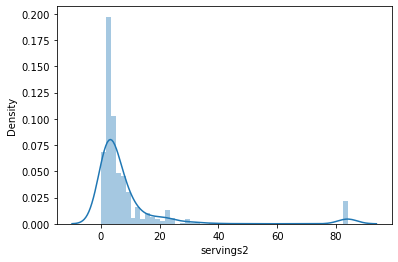

In [260]:
sns.distplot(df2.)

In [275]:
px.scatter(x = df2['price2'], y = df2['Energy3'])

In [278]:
px.scatter(x = df2['price2'], y = df2['servings2'])

In [27]:
# df2 = df2[df2.Energy.str.strip('kcal')] 

In [58]:
df1 = df1.drop(index=663)


In [158]:
df1[df1['Energy'] == 'kcal'].sum()


df1[df1['Energy'].str.match('197.1kJ/47.3kcalper 100 mls')] 
df1[df1['Energy'].str.match('1490kJPer 100 gms')]
df1[df1['Energy'].str.match('76')]

,product_name,weight,servings,price,Energy,Carbohydrate,Of which Sugars,Fat,Of which Saturates,Fibre,Protein,Salt,weight1,price2,servings2
535,Waitrose Duchy Organic Cooked King Prawns,150g,Typical values as sold,£5.00,76kcal,<0.5g,<0.5g,<0.5g,0.1g,0.5g,17.6g,1.10g,150,5.00,None
640,Actimel Strawberry Yogurt Drinks,8x100g,. *RI: Reference intake of an average adult (8...,£2.75,76kcal,12g,12g,1.5g,1.0g,0.0g,2.8g,0.10g,8x100,2.75,None
1140,Light & Free Cottage Cheese Vegetables & Thyme,210g,. ***RI: Reference intake of an average adult ...,£1.50,76,6.4,6.0,0.5,0.1,NaN,12,0.65,210,1.50,None
2605,Actimel Strawberry Yogurt Drinks,12x100g,. *RI: Reference intake of an average adult (8...,£3.75,76kcal,12g,12g,1.5g,1.0g,0.0g,2.8g,0.10g,12x100,3.75,None
2675,The Collective Dairy For Kids Apple & Blackcur...,100g,. NRV = Nutrient Reference Value,50p,76kcal,9.1g,7.6g,2.8g,1.9g,NaN,3.7g,0.09g,100,0.50,None
2819,Waitrose Classics Braised Beef & Mash,450g,Typical values as prepared. Contains 1 Servings,£3.50,76kcal,5.9g,2.3g,1.9g,0.8g,1.1g,8.2g,0.28g,450,3.50,1
3155,Waitrose Green Thai Chicken Soup,600g,Typical values as prepared. Contains 2 Servings,£2.50,76kcal,5.9g,2.2g,4.4g,3.2g,0.9g,2.7g,0.38g,600,2.50,2
3282,River Cottage Organic Kombucha Garden,275ml,. *RI : Reference intake of an average adult (...,£1.75,76kJ,4.4g,4.0g),<0.1g,<0.1g),<0.5g,<0.1g,0g,None,1.75,None
3357,Arla Protein Raspberry Strawberry Milk Drink,225ml,. *RI = Reference intake,£1.00,76kcal,6.5g,6.4g,1.6g,1.0g,NaN,9.0g,0.11g,None,1.00,None
5757,Amy's kitchen lentil soup,400g,Typical values as sold. Contains 2 Servings,£2.00,76kcal,9.7g,1.3g,2.4g,0.4g,1.8g,3.0g,0.64g,400,2.00,2


In [193]:
def clean_energy(x):
    if 'kcal' in x:
       y = float(re.sub('kcal', "", x))
       return y
    # elif 'Kcal' in x:
    #     return float(re.sub('Kcal', "", x))
    
    else:
        pass
    # elif 'kJ' in x:
    #     return float(re.sub('kJ', "", x)) * 0.239
    # elif 'KJ' in x:
    #     return float(re.sub('KJ', "", x)) * 0.239
    # elif '309 kJ / 73 kcalper 100 g' in x:
    #     print("WellDone")
    #     return float(re.sub('309 kJ / 73 kcalper 100 g', "73", x))
   
    #     # print(x)
    # elif '79' in x:
    #     digits_1 = re.findall("\d{1,2}", x)
    #     for i in digits_1:
    #         return float(i)
    # elif '76' in x:
    #     digits_1 = re.findall("\d{1,2}", x)
    #     print( digits_1)
    #     for i in digits_1:
    #         print(i)
    #         return i
    # elif '1490kJPer 100 gms' in x:
    #      b =  float(re.sub('1490kJPer 100 gms', "1490", x)) * 0.239
    #      print(b)
    #      return b

    # elif '' in x:
    #     print(x)
    #     digits_1 = re.findall("\d{1,4}", x)
    #     for i in digits_1:
    #         print(i)
    #         return float(i)
    # else:
    #     print(x)
  


how to calculate nutritional values?

In [189]:
df2

,product_name,weight,servings,price,Energy,Carbohydrate,Of which Sugars,Fat,Of which Saturates,Fibre,Protein,Salt,weight1,price2,servings2
0,Essential Small Whole Chicken Without Giblets,1.2kg,Typical values as prepared. Contains 4 Servings,£3.50,205kcal,0.0g,0.0g,9.8g,2.4g,0.0g,29.3g,0.18g,1200,3.50,4
1,Waitrose Crackling Pork Boneless Leg Roast,1.11kg,Typical values as sold. Contains 1 Servings,£6.30,275kcal,<0.5g,<0.5g,22.5g,7.7g,<0.5g,17.8g,0.44g,1110,6.30,1
2,Essential British Chicken Large,1.75kg,Typical values as prepared. Contains 7 Servings,£4.75,205kcal,0.0g,0.0g,9.8g,2.4g,0.0g,29.3g,0.18g,1750,4.75,7
3,No.1 Corn Fed Free Range Whole Chicken,1.58kg,Typical values as prepared. Contains 4 Servings,£11.14,190kcal,0.0g,0.0g,9.1g,2.5g,0.5g,26.9g,0.17g,1580,11.14,4
4,Waitrose 2 British Lamb Leg Shanks,0.9kg,Typical values per edible portion,£8.10,187kcal,0.0g,0.0g,12.3g,5.4g,0.0g,19.0g,0.14g,900,8.10,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7507,Gourmet Burger House Relish,250g,Typical values as sold. Contains 8 Servings,£2.00,122kcal,26.8g,25.2g,0.6g,0.1g,1.8g,1.5g,2.1g,250,2.00,8
7508,Tracklements fig relish,250g,Typical values as sold. Contains 8 Servings,£4.00,217kcal,46.9g,46.5g,0.9g,0.3g,6.0g,1.9g,0.1g,250,4.00,8
7509,Patum Peperium The Poacher's Relish,39g,Typical values as sold. Contains 8 Servings,£1.99,337kcal,8.3g,2.9g,29.4g,14.5g,NaN,9.5g,15.5g,39,1.99,8
7510,Gourmet Burger Chilli Relish,240g,Typical values as sold. Contains 8 Servings,£2.00,98kcal,22.4g,15.7g,0.1g,0.0g,1.7g,1.2g,1.8g,240,2.00,8


In [28]:
# df1['Energy1'] = df1['Energy'].apply(clean_energy)


# print(f"Unique Values in Servings2 Column are: {df1['Energy'].unique()}")
# df1.isnull().sum()

#### Select rows that match a string

In [291]:
# df1 = df1.dropna(subset = ['Energy'], inplace=True)


In [29]:
# df1 = df1.drop(['servings1'], axis=1)


In [68]:
df1['Energy'].unique()

array(['205kcal', '275kcal', '190kcal', '187kcal', '173kcal', '179kcal',
       '153kcal', '141kcal', '246kcal', '198kcal', '178kcal', '208kcal',
       '197kcal', '185kcal', '207kcal', '212kcal', '251kcal', '222kcal',
       '169kcal', '316kcal', '235kcal', '191kcal', '209kcal', '172kcal',
       '245kcal', '348kcal', '151kcal', '159kcal', '162kcal', '177kcal',
       '218kcal', '188kcal', '228kcal', '225kcal', '200kcal', '223kcal',
       '213kcal', '134kcal', '192kcal', '131kcal', '161kcal', '164kcal',
       '142kcal', '180kcal', '272kcal', '122kcal', '104kcal', '170kcal',
       '125kcal', '262kcal', '121kcal', '219kcal', '171kcal', '199kcal',
       '238kcal', '263kcal', '216kcal', '175kcal', '256kcal', '286kcal',
       '144kcal', '166kcal', '139kcal', '107kcal', '234kcal', '273kcal',
       '285kcal', '812kcal', '167kcal', '146kcal', '243kcal', '174kcal',
       '266kcal', '270kcal', '236kcal', '302kcal', '109kcal', '277kcal',
       '0kcal', '220kcal', '186kcal', '241kcal', '1

In [114]:
x = '197.1kJ/47.3per 100 mls'
if  '197.1kJ/47.3per 100 mls' in x:
    print( float(re.sub('197.1kJ/47.3per 100 mls', "47", x)))

x1 = 'I am 25 years old, 300, 20'

# [0-9]\d\d
# "\D(\d{5})\D"
digits_1 = re.findall("\d{2,3}", x1)
# for i in digits_1:
print(digits_1)


       

# a = float(re.sub('kcal', "", energy))
# print(a)


47.0
['25', '300', '20']


### Detailed explanation: how we cleaned 'servings' column

### Check the unique values in the 'servings' columns 

In [157]:
servings_unique_values = df1.groupby(["servings"]).sum()
servings_unique_values.index

for i in servings_unique_values.index:
    print(i)


J/2000 kcal)
. This pack contains 25 servings, ¢1 With 195ml of semi skimmed milk, *Reference intake of an average adult (8400 kJ/2000 kcal)
. This pack contains 25 servings, ¢1 With 300ml of semi skimmed milk, *Reference intake of an average adult (8400 kJ/2000 kcal)
. This pack contains 3 lollies, *Reference intake of an average adult (8400kJ/2000kcal)
. This pack contains 3 ovened servings
. This pack contains 3 portions
. This pack contains 3 servings
. This pack contains 3-4 servings, *Reference intake of an average adult (8400 kJ/2000 kcal)
. This pack contains 4 microwaved servings
. This pack contains 4 ovened servings
. This pack contains 4 portions
. This pack contains 4 portions, †with semi-skimmed milk
. This pack contains 4 servings
. This pack contains 4-5 serving(s), *Reference intake of an average adult (8400 kJ/2000 kcal)
. This pack contains 4-5 servings, * Reference intake of an average adult (8400 kJ/2000 kcal)
. This pack contains 5 oven baked servings
. This pack 

(1240, 3)

In [230]:
servings_unique_values

,product_name,weight,price
servings,,,
"% RI (10g)*. *reference intake of an average adult (8400 kJ/2000 kcal), ** the pack contains approx. 8 servings",Principe Italian prosciutto crudo,70g,£2.79
"% RI (20g)*. *reference intake of an average adult (8400 kJ/2000 kcal), ** the pack contains approx. 6 servings",Principe Prosciutto Cotto Italian Cooked HamPr...,110g115g,£2.79£2.79
"% RI*. *Reference intake of an average adult (8400kJ / 2000kcal), This pack contains 6 servings",Deli Kitchen Seeded Folded Flatbreads,6s,£1.25
% RI*. *Reference intake of an average adult (8400kJ/2000kcal),Campbell's Condensed Mushroom SoupCampbell's c...,295g295g,£1.05£1.05
"% Reference Intake*. Typical number of biscuits per pack: 21, *Reference Intake of an average adult (8400kJ / 2000kcal)",Hovis digestive biscuits,250g,89p
...,...,...,...
Typical values. Contains 7 Servings,Essential Condensed Milk,397g,£1.10
Typical values. Contains 8 Servings,No.1 Halloumi with MintEssential Cypriot Hallo...,250g250g250g250g200g150g280g530g520g400g400g40...,£3.25£2.55£2.55£2.50£3.25£2.00£1.60£5.00£3.75£...
Typical values. Contains 9 Servings,Waitrose Richly Fruited Mini Hot Cross BunsCoo...,9s690g400g,£1.50£2.50£1.00


### we can now see the unique values in the column. We can see that there are 1240 unique values. Lets extract only the digits that is between contains and servings.

For example: 'contains 6 servings'

**Let's write a function using regex that will find all the single digits.**

In [160]:
def clean_servings_example(x):
    if'contains' in x and 'servings' in x:
        digits = re.findall("[0-9]", x)
        for i in digits:
            return i

In [173]:
df1['servings1'] = df1['servings'].apply(clean_servings_example)

By applying the clean_servings_example we have extracted the digits from only approx. 400 rows. Because this operation created 7111 null values. 

In [174]:
df1.isnull().sum()

product_name             0
weight                   0
servings                 0
price                    0
Energy                 156
Carbohydrate           167
Of which Sugars        223
Fat                    171
Of which Saturates     235
Fibre                 1596
Protein                166
Salt                   212
servings1             7111
dtype: int64

In [176]:
df1['servings1'].unique()

array([None, '2', '6', '1', '8', '4', '9', '5', '3', '7'], dtype=object)

lets look at the unique values in the column we just created. It contains values between 0 and 9 and None, it does not contain any double digits, although our data contains double digit servings. 

let's rewrite our code

In [177]:
def clean_servings_example1(x):
    if'contains' in x and 'servings' in x:
        digits = re.findall("\d{1,2}", x)
        for i in digits:
            return i

In [179]:
df1['servings1'] = df1['servings'].apply(clean_servings_example1)
df1['servings1'].unique()

array([None, '2', '6', '12', '84', '4', '96', '5', '8', '3', '20', '10',
       '30', '1', '15', '7', '65', '25', '45', '11', '18', '13', '14',
       '17', '22'], dtype=object)

In [175]:
df1

,product_name,weight,servings,price,Energy,Carbohydrate,Of which Sugars,Fat,Of which Saturates,Fibre,Protein,Salt,servings1
0,Essential Small Whole Chicken Without Giblets,1.2kg,Typical values as prepared. Contains 4 Servings,£3.50,205kcal,0.0g,0.0g,9.8g,2.4g,0.0g,29.3g,0.18g,None
1,Waitrose Crackling Pork Boneless Leg Roast,Typical weight 1.11kg,Typical values as sold. Contains 1 Servings,£6.30,275kcal,<0.5g,<0.5g,22.5g,7.7g,<0.5g,17.8g,0.44g,None
2,Essential British Chicken Large,1.75kg,Typical values as prepared. Contains 7 Servings,£4.75,205kcal,0.0g,0.0g,9.8g,2.4g,0.0g,29.3g,0.18g,None
3,No.1 Corn Fed Free Range Whole Chicken,Typical weight 1.58kg,Typical values as prepared. Contains 4 Servings,£11.14,190kcal,0.0g,0.0g,9.1g,2.5g,0.5g,26.9g,0.17g,None
4,Waitrose 2 British Lamb Leg Shanks,Typical weight 0.9kg,Typical values per edible portion,£8.10,187kcal,0.0g,0.0g,12.3g,5.4g,0.0g,19.0g,0.14g,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7507,Gourmet Burger House Relish,250g,Typical values as sold. Contains 8 Servings,£2.00,122kcal,26.8g,25.2g,0.6g,0.1g,1.8g,1.5g,2.1g,None
7508,Tracklements fig relish,250g,Typical values as sold. Contains 8 Servings,£4.00,217kcal,46.9g,46.5g,0.9g,0.3g,6.0g,1.9g,0.1g,None
7509,Patum Peperium The Poacher's Relish,39g,Typical values as sold. Contains 8 Servings,£1.99,337kcal,8.3g,2.9g,29.4g,14.5g,NaN,9.5g,15.5g,None
7510,Gourmet Burger Chilli Relish,240g,Typical values as sold. Contains 8 Servings,£2.00,98kcal,22.4g,15.7g,0.1g,0.0g,1.7g,1.2g,1.8g,None


In [140]:
df1['servings2'].unique()

array([None, '2', '6', '1', '8', '4', '9', '5', '7', '3'], dtype=object)

In [141]:
 #checking how many null values of servings in the column
 df1[df1['servings2'].isnull() == True].shape


(6657, 13)

In [21]:
print(df.servings.unique())

['Typical values as prepared. Contains 4 Servings'
 'Typical values as sold. Contains 1 Servings'
 'Typical values as prepared. Contains 7 Servings' ...
 'Typical values as sold This pack provides 17 servings. Contains 17 Servings'
 'Typical values as sold This pack provides 14 servings. Contains 14 Servings'
 '. Contains 17 Servings']


In [148]:
x = "Contains 13 Servings"
x1 = 'Typical values as prepared. Contains 7 Servings'
digits_2 = re.findall("\d{1,2}", x1)

print(digits_2)
for i in digits_2:
    print(i)


['7']
7


### Find Unique values

In [22]:
# df['weight2'].unique()

In [23]:
# df.price.unique()

In [72]:
df.weight2.dropna()

0       1200
1       1110
2       1750
3       1580
4        900
        ... 
7507     250
7508     250
7509      39
7510     240
7511     430
Name: weight2, Length: 6158, dtype: object

In [97]:
df.drop(['weight1'], axis =1)

,Unnamed: 0,price,product_name,servings,weight,weight2,price2,servings2
0,0,£3.50,Essential Small Whole Chicken Without Giblets,Typical values as prepared. Contains 4 Servings,1.2kg,1200,3.50,[4]
1,1,£6.30,Waitrose Crackling Pork Boneless Leg Roast,Typical values as sold. Contains 1 Servings,1.11kg,1110,6.30,[1]
2,2,£4.75,Essential British Chicken Large,Typical values as prepared. Contains 7 Servings,1.75kg,1750,4.75,[7]
3,3,£11.14,No.1 Corn Fed Free Range Whole Chicken,Typical values as prepared. Contains 4 Servings,1.58kg,1580,11.14,[4]
4,4,£8.10,Waitrose 2 British Lamb Leg Shanks,Typical values per edible portion,0.9kg,900,8.10,[]
...,...,...,...,...,...,...,...,...
7507,7507,£2.00,Gourmet Burger House Relish,Typical values as sold. Contains 8 Servings,250g,250,2.00,[8]
7508,7508,£4.00,Tracklements fig relish,Typical values as sold. Contains 8 Servings,250g,250,4.00,[8]
7509,7509,£1.99,Patum Peperium The Poacher's Relish,Typical values as sold. Contains 8 Servings,39g,39,1.99,[8]
7510,7510,£2.00,Gourmet Burger Chilli Relish,Typical values as sold. Contains 8 Servings,240g,240,2.00,[8]


In [129]:
df['price2'].sort_values(ascending= False)

560     125.00
559      50.00
35       41.99
22       26.38
4313     25.00
         ...  
1723      0.15
1270      0.14
1289      0.13
1284      0.09
1269      0.08
Name: price2, Length: 7512, dtype: float64

In [35]:
x = df.groupby(["servings"]).sum()
x.index
for i in x.index:
    print(i)

J/2000 kcal)
. This pack contains 25 servings, ¢1 With 195ml of semi skimmed milk, *Reference intake of an average adult (8400 kJ/2000 kcal)
. This pack contains 25 servings, ¢1 With 300ml of semi skimmed milk, *Reference intake of an average adult (8400 kJ/2000 kcal)
. This pack contains 3 lollies, *Reference intake of an average adult (8400kJ/2000kcal)
. This pack contains 3 ovened servings
. This pack contains 3 portions
. This pack contains 3 servings
. This pack contains 3-4 servings, *Reference intake of an average adult (8400 kJ/2000 kcal)
. This pack contains 4 microwaved servings
. This pack contains 4 ovened servings
. This pack contains 4 portions
. This pack contains 4 portions, †with semi-skimmed milk
. This pack contains 4 servings
. This pack contains 4-5 serving(s), *Reference intake of an average adult (8400 kJ/2000 kcal)
. This pack contains 4-5 servings, * Reference intake of an average adult (8400 kJ/2000 kcal)
. This pack contains 5 oven baked servings
. This pack 

I am an int9llig9nt stud9nt
I am an inteigent student
2490.0


### References 

STR operations
- https://stackoverflow.com/questions/26825729/extract-number-from-string-in-python

PANDAS 
- https://realpython.com/python-data-cleaning-numpy-pandas/


- https://www.kdnuggets.com/2019/06/select-rows-columns-pandas.html
- https://www.journaldev.com/33492/pandas-dropna-drop-null-na-values-from-dataframe
- https://note.nkmk.me/en/python-pandas-drop/


MISING values
-https://stackoverflow.com/questions/28199524/- -best-way-to-count-the-number-of-rows-with-missing-values-in-a-pandas-dataframe


REGEX
- https://www.guru99.com/python-regular-expressions-complete-tutorial.html
- https://docs.python.org/3/library/re.html
- https://riptutorial.com/regex/example/5023/matching-various-numbers
- https://stackoverflow.com/questions/47487894/regex-to-match-all-single-or-double-digit-numbers
- https://www.fireblazeaischool.in/blogs/python-regex-operations/
- https://note.nkmk.me/en/python-str-replace-translate-re-sub/
- https://stackoverflow.com/questions/46344634/python-strip-function-definition-using-regex
- https://www.w3schools.com/python/python_regex.asp#search




duplicates

https://thispointer.com/pandas-find-duplicate-rows-in-a-dataframe-based-on-all-or-selected-columns-using-dataframe-duplicated-in-python/

CONCATENATION

XPATH

https://www.guru99.com/xpath-selenium.html

